# Using Object Oriented Programming via ShelvingAnalysis.py

Extract data for Z:/AION/Data/2024/08/29/shelving_DPAOM_amp10/shelvingX/shelvingX_XX.csv, replace X with anything you like

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "/Volumes/MBQD_data/AION/Data/2024/08/29/"
sub_directory_path = "shelving_DPAOM_amp10/"
dataset_path = "shelving6/" #change here
data_path = "shelving6_13.csv" #change here

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

ShelvingAnalysisInstance = ShelvingAnalysis(file_path)
ShelvingAnalysisInstance.extract_data()
ShelvingAnalysisInstance.extract_ROI_peaks(plot=True)
ShelvingAnalysisInstance.extract_shelving_intensity()

KeyboardInterrupt: 

# 250504 Plot nice graph

In [3]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "/Volumes/MBQD_data/AION/Data/2024/08/29/"
sub_directory_path = "shelving_DPAOM_amp10/"
dataset_path = "shelving6/" #change here
data_path = "shelving6_13.csv" #change here

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

In [5]:
## ----------------------------- EXTRACT DATA ----------------------------- ##

data = pd.read_csv(file_path)
time = data.iloc[1:, 0].astype(float).to_numpy() # convert to numpy
mot_pd_voltage = data.iloc[1:, 4].astype(float).rolling(window=100).mean().to_numpy() + 160 #clean mot pd voltage data with a rolling mean & convert to numpy

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_53425/46639751.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [6]:
## ----------------------------- SECTION OUT ROIs FROM DATA ----------------------------- ##

index_average_mot_pd = 200000 #t=2s
ROI1_left = int(3.5*5e4+100000) #t=3.5s
ROI1_right = int(4*5e4+100000) #t=4s
ROI2_left = int(5.5*5e4+100000) #t=5.5s
ROI2_right = int(6*5e4+100000) #t=6s
ROI3_left = int(7.5*5e4+100000) #t=7.5s
ROI3_right = int(8*5e4+100000) #t=8s
ROI4_left = int(9.5*5e4+100000) #t=9.5s
ROI4_right = int(10*5e4+100000) #t=10s

In [7]:
## ----------------------------- EXTRACT PEAKS ----------------------------- ##

mot_pd_voltage_ROI1 = mot_pd_voltage[ROI1_left:ROI1_right]
peaks1, _ = find_peaks(mot_pd_voltage_ROI1, distance=ROI1_right-ROI1_left)
mot_pd_voltage_ROI2 = mot_pd_voltage[ROI2_left:ROI2_right]
peaks2, _ = find_peaks(mot_pd_voltage_ROI2, distance=ROI2_right-ROI2_left)
mot_pd_voltage_ROI3 = mot_pd_voltage[ROI3_left:ROI3_right]
peaks3, _ = find_peaks(mot_pd_voltage_ROI3, distance=ROI3_right-ROI3_left)
mot_pd_voltage_ROI4 = mot_pd_voltage[ROI4_left:ROI4_right]
peaks4, _ = find_peaks(mot_pd_voltage_ROI4, distance=ROI4_right-ROI4_left)


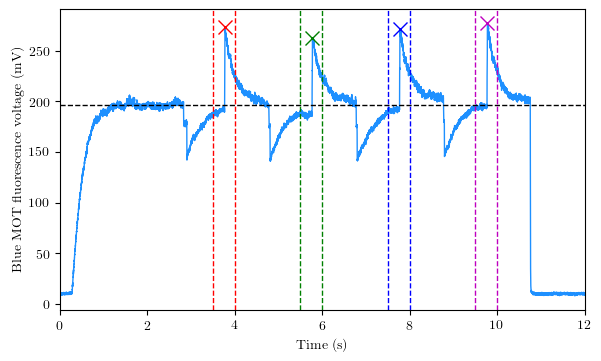

In [10]:
## ----------------------------- PLOT DATA ----------------------------- ##

# plt.figure(figsize=(20, 8))
plt.plot(time, mot_pd_voltage, color='dodgerblue', linewidth=1)
# plt.axvline(x=time[index_average_mot_pd], color='k', linestyle='--')
plt.axhline(y=mot_pd_voltage[index_average_mot_pd], color='k', linestyle='--')
plt.axvline(x=time[ROI1_left], color='r', linestyle='--')
plt.axvline(x=time[ROI1_right], color='r', linestyle='--')
plt.axvline(x=time[ROI2_left], color='g', linestyle='--')
plt.axvline(x=time[ROI2_right], color='g', linestyle='--')
plt.axvline(x=time[ROI3_left], color='b', linestyle='--')
plt.axvline(x=time[ROI3_right], color='b', linestyle='--')
plt.axvline(x=time[ROI4_left], color='m', linestyle='--')
plt.axvline(x=time[ROI4_right], color='m', linestyle='--')
plt.plot(time[peaks1+ROI1_left], mot_pd_voltage_ROI1[peaks1], "x", color='r', markersize=10)
plt.plot(time[peaks2+ROI2_left], mot_pd_voltage_ROI2[peaks2], "x", color='g', markersize=10)
plt.plot(time[peaks3+ROI3_left], mot_pd_voltage_ROI3[peaks3], "x", color='b', markersize=10)
plt.plot(time[peaks4+ROI4_left], mot_pd_voltage_ROI4[peaks4], "x", color='m', markersize=10)
plt.grid(False)
plt.xlim(0, 12)
plt.xlabel("Time (s)")
plt.ylabel("Blue MOT fluorescence voltage (mV)")
plt.savefig("ShelvingDataAnalysisSample.pdf",dpi=300)

In [ ]:
## ----------------------------- GIVE DATA OUTPUT ----------------------------- ##

print("Average MOT PD Voltage: ", mot_pd_voltage[index_average_mot_pd])
print("Peak 1 values: ", time[peaks1+ROI1_left], mot_pd_voltage_ROI1[peaks1])
print("Peak 2 values: ", time[peaks2+ROI2_left], mot_pd_voltage_ROI2[peaks2])
print("Peak 3 values: ", time[peaks3+ROI3_left], mot_pd_voltage_ROI3[peaks3])
print("Peak 4 values: ", time[peaks4+ROI4_left], mot_pd_voltage_ROI4[peaks4])

## ----------------- OUTPUT SHELVING INTENSITY & UNCERTAINTY ----------------- ##

# the shelving intensity is calculated as the ratio of the peak intensity to the average intensity, normalised to the average intensity

shelving_intensity_1 = mot_pd_voltage_ROI1[peaks1]/mot_pd_voltage[index_average_mot_pd] - 1 
shelving_intensity_2 = mot_pd_voltage_ROI2[peaks2]/mot_pd_voltage[index_average_mot_pd] - 1
shelving_intensity_3 = mot_pd_voltage_ROI3[peaks3]/mot_pd_voltage[index_average_mot_pd] - 1
shelving_intensity_4 = mot_pd_voltage_ROI4[peaks4]/mot_pd_voltage[index_average_mot_pd] - 1

shelving_intensity_avg = np.mean([shelving_intensity_1, shelving_intensity_2, shelving_intensity_3, shelving_intensity_4])
shelving_intensity_uncertainty = np.std([shelving_intensity_1, shelving_intensity_2, shelving_intensity_3, shelving_intensity_4])

print("Shelving Intensity: ", shelving_intensity_avg)
print("Shelving Intensity Uncertainty: ", shelving_intensity_uncertainty)

Average MOT PD Voltage:  194.4635755
Peak 1 values:  [3.6223598] [278.82345]
Peak 2 values:  [5.62103975] [284.885582]
Peak 3 values:  [7.6227197] [279.478984]
Peak 4 values:  [9.62149965] [280.445448]
Shelving Intensity:  0.4445294717930351
Shelving Intensity Uncertainty:  0.012175147100992018


# Example Analysis via Jupyter Notebook 

Extract data for Z:/AION/Data/2024/08/29/shelving_DPAOM_amp10/shelvingX/shelvingX_XX.csv, replace X with anything you like

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "Z:/AION/Data/2024/08/29/"
sub_directory_path = "shelving_DPAOM_amp10/"
dataset_path = "shelving5/"
data_path = "shelving5_01.csv"

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

In [3]:
## ----------------------------- EXTRACT DATA ----------------------------- ##

data = pd.read_csv(file_path)
time = data.iloc[1:, 0].astype(float).to_numpy() # convert to numpy
mot_pd_voltage = data.iloc[1:, 4].astype(float).rolling(window=100).mean().to_numpy() + 160 #clean mot pd voltage data with a rolling mean & convert to numpy

c:\Users\Michael\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
## ----------------------------- SECTION OUT ROIs FROM DATA ----------------------------- ##

index_average_mot_pd = 200000 #t=2s
ROI1_left = int(3.5*5e4+100000) #t=3.5s
ROI1_right = int(4*5e4+100000) #t=4s
ROI2_left = int(5.5*5e4+100000) #t=5.5s
ROI2_right = int(6*5e4+100000) #t=6s
ROI3_left = int(7.5*5e4+100000) #t=7.5s
ROI3_right = int(8*5e4+100000) #t=8s
ROI4_left = int(9.5*5e4+100000) #t=9.5s
ROI4_right = int(10*5e4+100000) #t=10s

In [6]:
## ----------------------------- EXTRACT PEAKS ----------------------------- ##

mot_pd_voltage_ROI1 = mot_pd_voltage[ROI1_left:ROI1_right]
peaks1, _ = find_peaks(mot_pd_voltage_ROI1, distance=ROI1_right-ROI1_left)
mot_pd_voltage_ROI2 = mot_pd_voltage[ROI2_left:ROI2_right]
peaks2, _ = find_peaks(mot_pd_voltage_ROI2, distance=ROI2_right-ROI2_left)
mot_pd_voltage_ROI3 = mot_pd_voltage[ROI3_left:ROI3_right]
peaks3, _ = find_peaks(mot_pd_voltage_ROI3, distance=ROI3_right-ROI3_left)
mot_pd_voltage_ROI4 = mot_pd_voltage[ROI4_left:ROI4_right]
peaks4, _ = find_peaks(mot_pd_voltage_ROI4, distance=ROI4_right-ROI4_left)


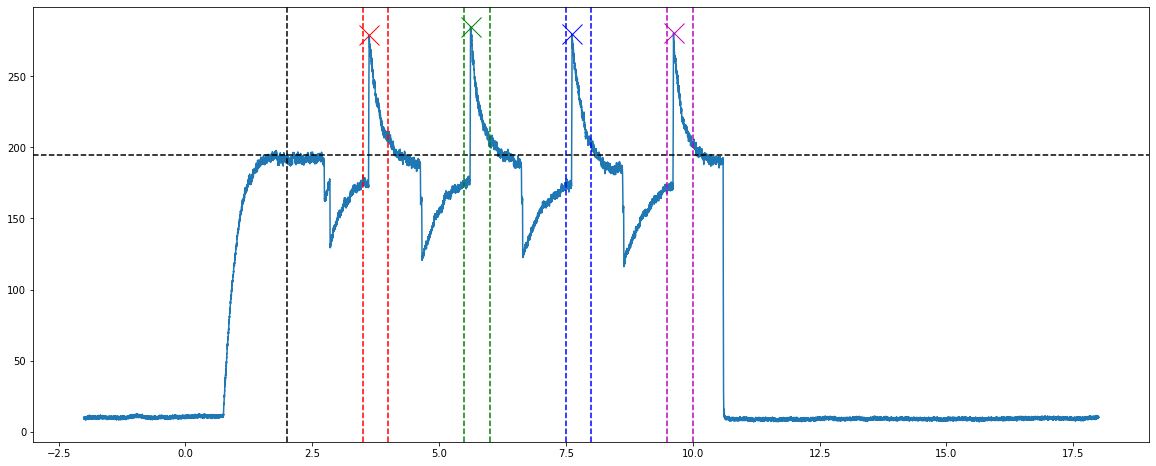

In [7]:
## ----------------------------- PLOT DATA ----------------------------- ##

plt.figure(figsize=(20, 8))
plt.plot(time, mot_pd_voltage)
plt.axvline(x=time[index_average_mot_pd], color='k', linestyle='--')
plt.axhline(y=mot_pd_voltage[index_average_mot_pd], color='k', linestyle='--')
plt.axvline(x=time[ROI1_left], color='r', linestyle='--')
plt.axvline(x=time[ROI1_right], color='r', linestyle='--')
plt.axvline(x=time[ROI2_left], color='g', linestyle='--')
plt.axvline(x=time[ROI2_right], color='g', linestyle='--')
plt.axvline(x=time[ROI3_left], color='b', linestyle='--')
plt.axvline(x=time[ROI3_right], color='b', linestyle='--')
plt.axvline(x=time[ROI4_left], color='m', linestyle='--')
plt.axvline(x=time[ROI4_right], color='m', linestyle='--')
plt.plot(time[peaks1+ROI1_left], mot_pd_voltage_ROI1[peaks1], "x", color='r', markersize=20)
plt.plot(time[peaks2+ROI2_left], mot_pd_voltage_ROI2[peaks2], "x", color='g', markersize=20)
plt.plot(time[peaks3+ROI3_left], mot_pd_voltage_ROI3[peaks3], "x", color='b', markersize=20)
plt.plot(time[peaks4+ROI4_left], mot_pd_voltage_ROI4[peaks4], "x", color='m', markersize=20)

In [8]:
## ----------------------------- GIVE DATA OUTPUT ----------------------------- ##

print("Average MOT PD Voltage: ", mot_pd_voltage[index_average_mot_pd])
print("Peak 1 values: ", time[peaks1+ROI1_left], mot_pd_voltage_ROI1[peaks1])
print("Peak 2 values: ", time[peaks2+ROI2_left], mot_pd_voltage_ROI2[peaks2])
print("Peak 3 values: ", time[peaks3+ROI3_left], mot_pd_voltage_ROI3[peaks3])
print("Peak 4 values: ", time[peaks4+ROI4_left], mot_pd_voltage_ROI4[peaks4])

## ----------------- OUTPUT SHELVING INTENSITY & UNCERTAINTY ----------------- ##

# the shelving intensity is calculated as the ratio of the peak intensity to the average intensity, normalised to the average intensity

shelving_intensity_1 = mot_pd_voltage_ROI1[peaks1]/mot_pd_voltage[index_average_mot_pd] - 1 
shelving_intensity_2 = mot_pd_voltage_ROI2[peaks2]/mot_pd_voltage[index_average_mot_pd] - 1
shelving_intensity_3 = mot_pd_voltage_ROI3[peaks3]/mot_pd_voltage[index_average_mot_pd] - 1
shelving_intensity_4 = mot_pd_voltage_ROI4[peaks4]/mot_pd_voltage[index_average_mot_pd] - 1

shelving_intensity_avg = np.mean([shelving_intensity_1, shelving_intensity_2, shelving_intensity_3, shelving_intensity_4])
shelving_intensity_uncertainty = np.std([shelving_intensity_1, shelving_intensity_2, shelving_intensity_3, shelving_intensity_4])

print("Shelving Intensity: ", shelving_intensity_avg)
print("Shelving Intensity Uncertainty: ", shelving_intensity_uncertainty)

Average MOT PD Voltage:  194.4635755
Peak 1 values:  [3.6223598] [278.82345]
Peak 2 values:  [5.62103975] [284.885582]
Peak 3 values:  [7.6227197] [279.478984]
Peak 4 values:  [9.62149965] [280.445448]
Shelving Intensity:  0.4445294717930351
Shelving Intensity Uncertainty:  0.012175147100992018


# Using Object Oriented Programming via ShelvingAnalysis.py

Extract data for Z:/AION/Data/2024/08/29/shelving_DPAOM_amp10/shelvingX/shelvingX_XX.csv, replace X with anything you like

C:\Users\Michael\AppData\Local\Temp/ipykernel_20176/2991877205.py:10: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  ShelvingAnalysisInstance = ShelvingAnalysis(file_path)


(0.4445294717930351, 0.012175147100992018)

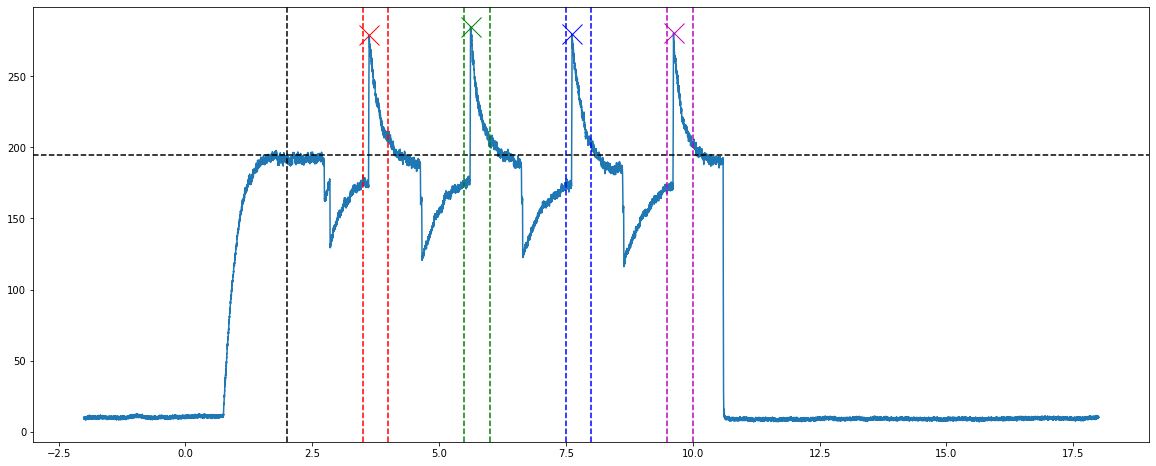

In [10]:
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "Z:/AION/Data/2024/08/29/"
sub_directory_path = "shelving_DPAOM_amp10/"
dataset_path = "shelving5/"
data_path = "shelving5_01.csv"

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

ShelvingAnalysisInstance = ShelvingAnalysis(file_path)
ShelvingAnalysisInstance.extract_data()
ShelvingAnalysisInstance.extract_ROI_peaks(plot=True)
ShelvingAnalysisInstance.extract_shelving_intensity()